In [42]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [58]:

# Create the dataset
data = {
    'Weld_Thickness': [
        22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        36, 36, 36, 36, 36, 36,
        40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40
    ],
    'Round': [
        'First', 'First', 'First', 'Final', 'Final', 'Final', 'First', 'First', 'First', 'Final', 'Final', 'Final',
        'First', 'First', 'First', 'Final', 'Final', 'Final', 'First', 'First', 'First', 'Final', 'Final', 'Final',
        'First', 'First', 'First', 'Final', 'Final', 'Final',
        'First', 'First', 'First', 'Final', 'Final', 'Final',
        'First', 'First', 'First', 'Final', 'Final', 'Final', 'First', 'First', 'First', 'Final', 'Final', 'Final',
        'First', 'First', 'First', 'Final', 'Final', 'Final'
    ],
    'Position': [
        1.25, 3.75, 7.5, 1.25, 3.75, 7.5, 1.25, 3.75, 7.5, 1.25, 3.75, 7.5,
        1.25, 3.75, 7.5, 1.25, 3.75, 7.5, 1.25, 3.75, 7.5, 1.25, 3.75, 7.5,
        1.25, 3.75, 7.5, 1.25, 3.75, 7.5,
        1.25, 3.75, 7.5, 1.25, 3.75, 7.5,
        1.25, 3.75, 7.5, 1.25, 3.75, 7.5, 1.25, 3.75, 7.5, 1.25, 3.75, 7.5,
        1.25, 3.75, 7.5, 1.25, 3.75, 7.5
    ],
    'Feed_Rate': [
        250, 240, 250, 210, 210, 200, 230, 240, 230, 220, 210, 220,
        330, 330, 330, 240, 240, 240, 340, 330, 330, 200, 210, 200,
        330, 320, 330, 210, 210, 220,
        240, 250, 250, 290, 280, 280,
        250, 250, 250, 220, 220, 220, 250, 250, 250, 220, 230, 220,
        250, 250, 250, 220, 220, 220
    ],
    'Ampere': [
        280, 270, 280, 270, 270, 270, 270, 280, 260, 280, 270, 270,
        330, 320, 330, 300, 280, 280, 270, 320, 330, 300, 300, 320,
        270, 290, 300, 290, 290, 280,
        350, 350, 350, 380, 380, 380,
        370, 370, 370, 360, 360, 370, 360, 370, 370, 360, 360, 370,
        370, 370, 370, 360, 360, 370
    ],
    'Voltage': [
        40, 45, 40, 40, 43, 43, 38, 38, 40, 40, 45, 40,
        40, 40, 40, 40, 38, 38, 46, 46, 45, 45, 45, 47,
        45, 45, 40, 40, 45, 46,
        45, 45, 45, 47, 47, 48,
        45, 46, 46, 48, 46, 48, 43, 45, 43, 48, 46, 48,
        45, 46, 46, 48, 46, 48
    ]
}


In [59]:
#data = pd.read_csv("C:/Users/Arif/Desktop/Prof_Yongsun/Sheet_1_9T_English_Updated.csv")

In [60]:
# Create DataFrame
df = pd.DataFrame(data)

In [61]:

# Convert Round to numeric
df['Round_Numeric'] = df['Round'].map({'First': 0, 'Final': 1})

In [62]:
# Prepare features and targets
X = df[['Weld_Thickness', 'Round_Numeric', 'Position']]
y = df[['Feed_Rate', 'Ampere', 'Voltage']]

In [63]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Create and train decision tree models for each output
models = {}
scores = {}
predictions = {}

for column in y.columns:
    # Create and train model
    model = DecisionTreeRegressor(random_state=42, max_depth=4)
    model.fit(X_train, y_train[column])
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate scores
    r2 = r2_score(y_test[column], y_pred)
    mse = mean_squared_error(y_test[column], y_pred)
    
    # Store results
    models[column] = model
    scores[column] = {'R2': r2, 'MSE': mse}
    predictions[column] = y_pred

Text(0.5, 1.0, 'Correlation Heatmap')

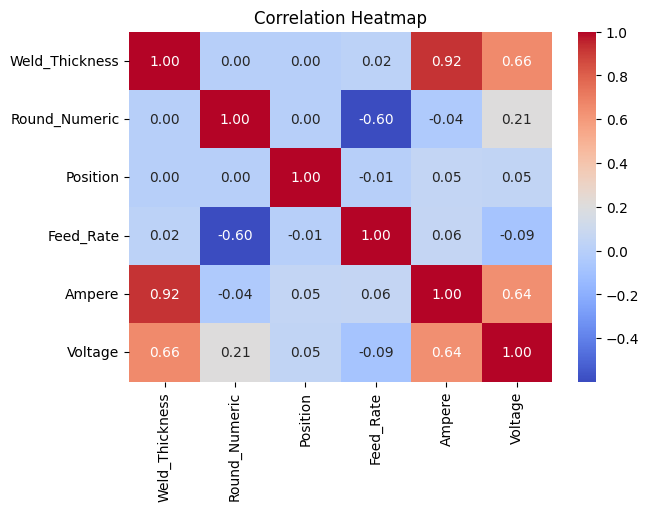

In [65]:
# Create visualizations
plt.figure(figsize=(15, 10))

# 1. Correlation Heatmap
plt.subplot(2, 2, 1)
correlation_matrix = df[['Weld_Thickness', 'Round_Numeric', 'Position', 'Feed_Rate', 'Ampere', 'Voltage']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')


Text(0.5, 1.0, 'Feature Importance by Output')

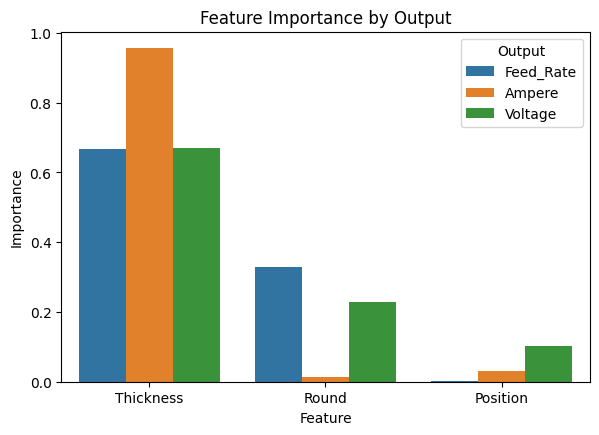

In [91]:
# 2. Feature Importance Plot
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
importance_data = []
for output in ['Feed_Rate', 'Ampere', 'Voltage']:
    importances = models[output].feature_importances_
    for feat, imp in zip(['Thickness', 'Round', 'Position'], importances):
        importance_data.append({'Output': output, 'Feature': feat, 'Importance': imp})
importance_df = pd.DataFrame(importance_data)
sns.barplot(x='Feature', y='Importance', hue='Output', data=importance_df)
plt.title('Feature Importance by Output')



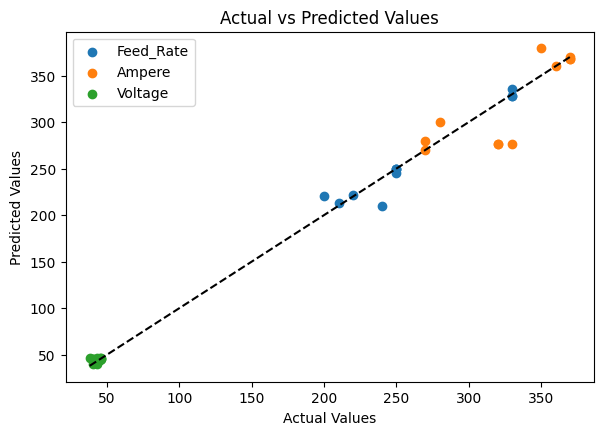

In [92]:
# 3. Actual vs Predicted Plot
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
for i, column in enumerate(['Feed_Rate', 'Ampere', 'Voltage']):
    plt.scatter(y_test[column], predictions[column], label=column)
plt.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], 'k--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()



Model Performance Metrics:

Feed_Rate:
R² Score: 0.9406
Mean Squared Error: 125.2374

Ampere:
R² Score: 0.4981
Mean Squared Error: 728.4091

Voltage:
R² Score: -0.7275
Mean Squared Error: 13.6490


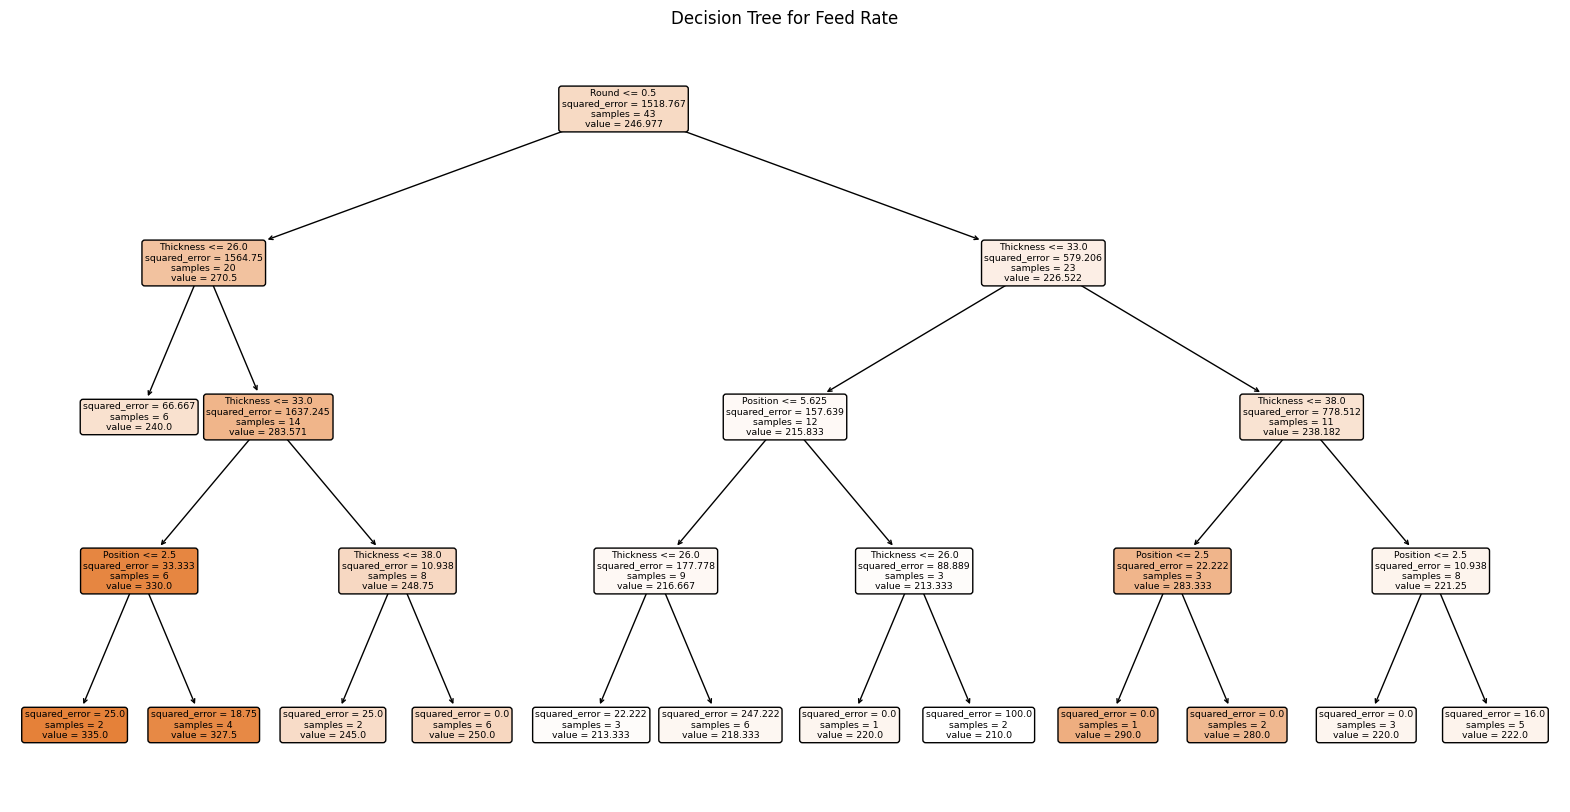

In [68]:
# Print model performance metrics
print("\nModel Performance Metrics:")
for output, metric in scores.items():
    print(f"\n{output}:")
    print(f"R² Score: {metric['R2']:.4f}")
    print(f"Mean Squared Error: {metric['MSE']:.4f}")

# Visualization of decision tree for Feed Rate
plt.figure(figsize=(20,10))
plot_tree(models['Feed_Rate'], feature_names=['Thickness', 'Round', 'Position'], 
          filled=True, rounded=True)
plt.title('Decision Tree for Feed Rate')
plt.show()


In [69]:
# Example prediction function
def predict_parameters(thickness, round_type, position):
    input_data = np.array([[thickness, 1 if round_type == 'Final' else 0, position]])
    predictions = {
        'Feed_Rate': models['Feed_Rate'].predict(input_data)[0],
        'Ampere': models['Ampere'].predict(input_data)[0],
        'Voltage': models['Voltage'].predict(input_data)[0]
    }
    return predictions

# Example usage
example_prediction = predict_parameters(30, 'First', 3.75)
print("\nExample Prediction for Thickness=30mm, First Round, Position=3.75:")
for param, value in example_prediction.items():
    print(f"{param}: {value:.2f}")


Example Prediction for Thickness=30mm, First Round, Position=3.75:
Feed_Rate: 327.50
Ampere: 276.67
Voltage: 45.33


d:\pythonenv\deeplearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
d:\pythonenv\deeplearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
d:\pythonenv\deeplearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [70]:
# Calculate a composite score for each position
scaler = MinMaxScaler()
df['Feed_Rate_Normalized'] = scaler.fit_transform(df[['Feed_Rate']])
df['Ampere_Normalized'] = scaler.fit_transform(df[['Ampere']])
df['Voltage_Normalized'] = scaler.fit_transform(df[['Voltage']])

df['Performance_Score'] = (df['Feed_Rate_Normalized'] + 
                         df['Ampere_Normalized'] + 
                         df['Voltage_Normalized']) / 3



In [71]:
# Group by thickness, round, and position to get average performance
position_analysis = df.groupby(['Weld_Thickness', 'Round', 'Position']).agg({
    'Feed_Rate': 'mean',
    'Ampere': 'mean',
    'Voltage': 'mean',
    'Performance_Score': 'mean'
}).reset_index()

In [72]:
# Find optimal positions
optimal_positions = position_analysis.loc[position_analysis.groupby(['Weld_Thickness', 'Round'])['Performance_Score'].idxmax()]

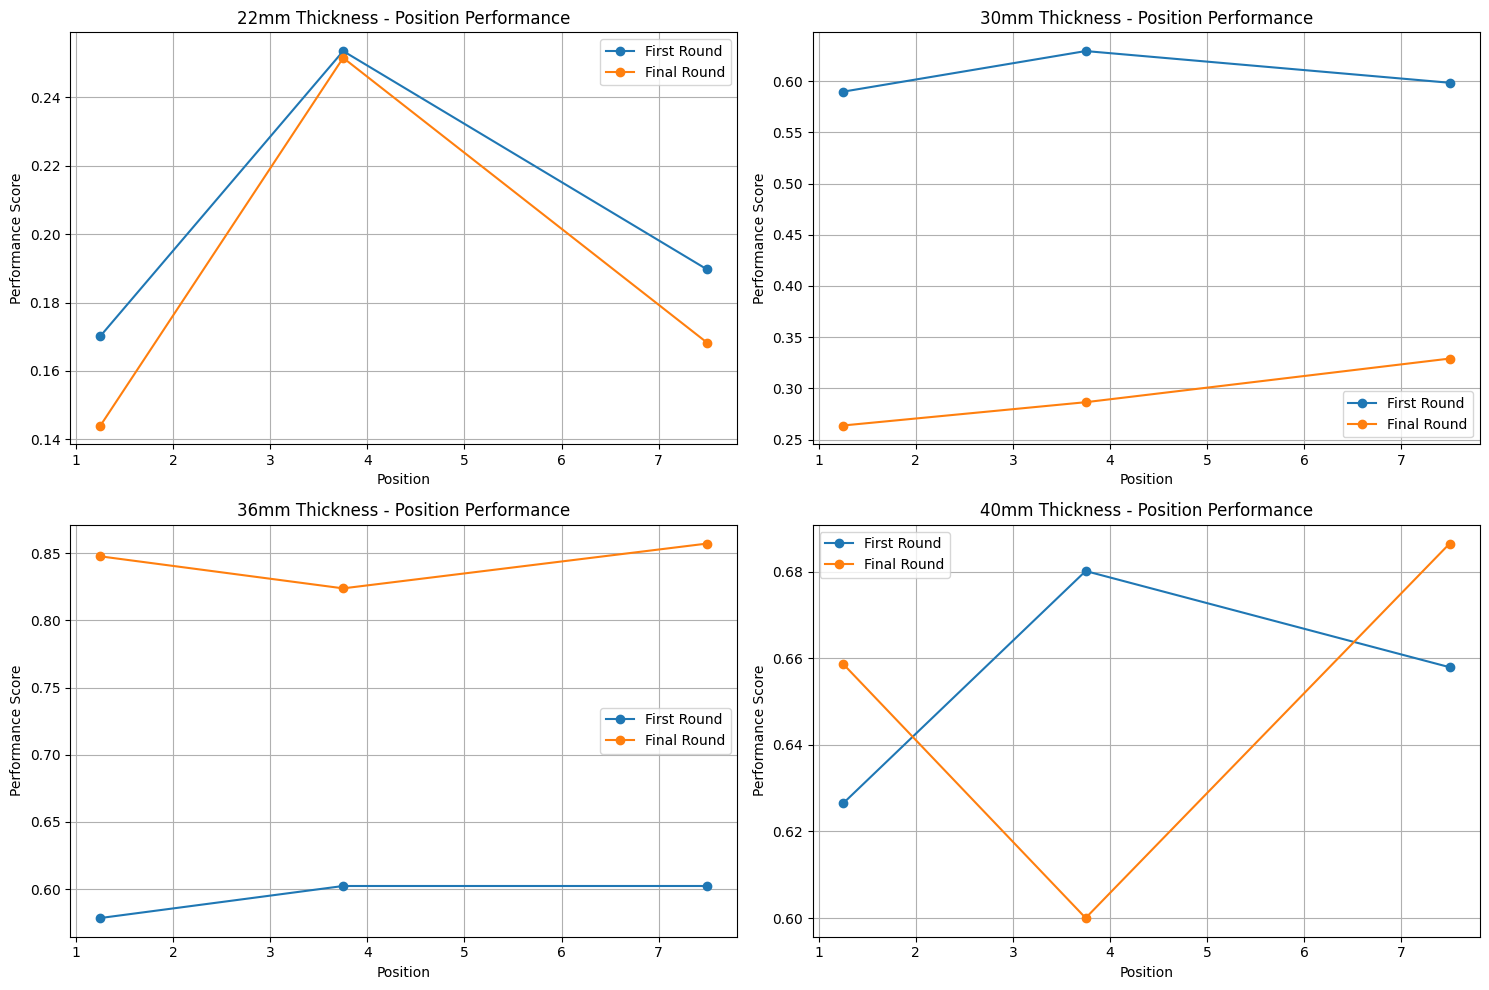

In [73]:
# Create visualization
plt.figure(figsize=(15, 10))

# Plot performance scores for each thickness and round
for thickness in df['Weld_Thickness'].unique():
    plt.subplot(2, 2, list(df['Weld_Thickness'].unique()).index(thickness) + 1)
    
    for round_type in ['First', 'Final']:
        data_subset = position_analysis[
            (position_analysis['Weld_Thickness'] == thickness) & 
            (position_analysis['Round'] == round_type)
        ]
        
        plt.plot(data_subset['Position'], data_subset['Performance_Score'], 
                marker='o', label=f'{round_type} Round')
        
    plt.title(f'{thickness}mm Thickness - Position Performance')
    plt.xlabel('Position')
    plt.ylabel('Performance Score')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



In [74]:
# Create summary table of optimal positions
print("\nOptimal Welding Positions Summary:")
print("=" * 80)
print(f"{'Thickness':^10} | {'Round':^10} | {'Best Position':^12} | {'Feed Rate':^10} | {'Ampere':^8} | {'Voltage':^8}")
print("-" * 80)

for _, row in optimal_positions.iterrows():
    print(f"{row['Weld_Thickness']:^10.0f} | {row['Round']:^10} | {row['Position']:^12.2f} | "
          f"{row['Feed_Rate']:^10.0f} | {row['Ampere']:^8.0f} | {row['Voltage']:^8.1f}")
# Calculate recommended parameter ranges
parameter_ranges = df.groupby(['Weld_Thickness', 'Round']).agg({
    'Feed_Rate': ['min', 'max'],
    'Ampere': ['min', 'max'],
    'Voltage': ['min', 'max']
}).round(1)



Optimal Welding Positions Summary:
Thickness  |   Round    | Best Position | Feed Rate  |  Ampere  | Voltage 
--------------------------------------------------------------------------------
    22     |   Final    |     3.75     |    210     |   270    |   44.0  
    22     |   First    |     3.75     |    240     |   275    |   41.5  
    30     |   Final    |     7.50     |    220     |   293    |   43.7  
    30     |   First    |     3.75     |    327     |   310    |   43.7  
    36     |   Final    |     7.50     |    280     |   380    |   48.0  
    36     |   First    |     3.75     |    250     |   350    |   45.0  
    40     |   Final    |     7.50     |    220     |   370    |   48.0  
    40     |   First    |     3.75     |    250     |   370    |   45.7  


In [75]:
# Calculate recommended parameter ranges
parameter_ranges = df.groupby(['Weld_Thickness', 'Round']).agg({
    'Feed_Rate': ['min', 'max'],
    'Ampere': ['min', 'max'],
    'Voltage': ['min', 'max']
}).round(1)

In [76]:
# 1. Analyze parameter consistency
consistency_analysis = df.groupby(['Weld_Thickness', 'Round']).agg({
    'Feed_Rate': ['mean', 'std', 'min', 'max'],
    'Ampere': ['mean', 'std', 'min', 'max'],
    'Voltage': ['mean', 'std', 'min', 'max']
}).round(2)

In [77]:
# 2. Calculate parameter ratios and relationships
df['Power'] = df['Ampere'] * df['Voltage']
df['Heat_Input'] = df['Power'] / df['Feed_Rate']

In [78]:
# 3. Analyze thickness transitions
thickness_transitions = df.groupby('Weld_Thickness').agg({
    'Feed_Rate': 'mean',
    'Ampere': 'mean',
    'Voltage': 'mean',
    'Heat_Input': 'mean'
}).diff()

Text(0, 0.5, 'Heat Input (Power/Feed Rate)')

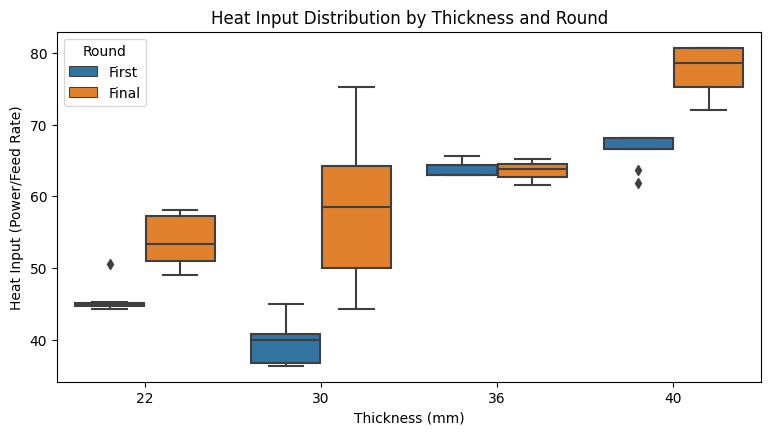

In [79]:
# 4. Visualize key relationships
plt.figure(figsize=(20, 10))

# Plot 1: Heat Input vs Thickness
plt.subplot(2, 2, 1)
sns.boxplot(x='Weld_Thickness', y='Heat_Input', hue='Round', data=df)
plt.title('Heat Input Distribution by Thickness and Round')
plt.xlabel('Thickness (mm)')
plt.ylabel('Heat Input (Power/Feed Rate)')

Text(0, 0.5, 'Coefficient of Variation (%)')

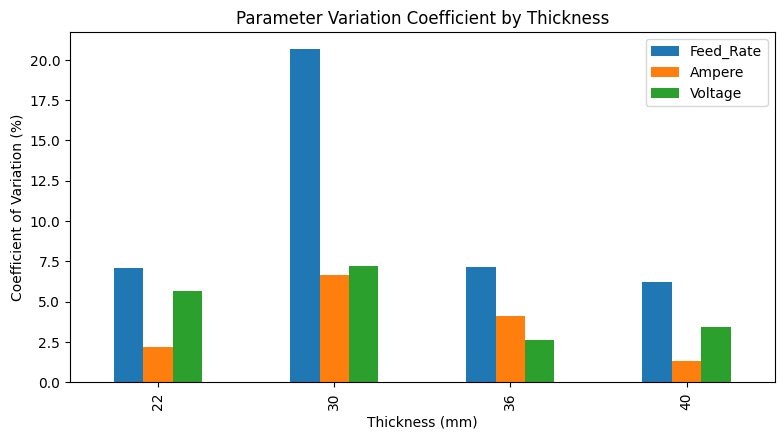

In [81]:
# Plot 2: Parameter Consistency
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 2)
parameter_cv = df.groupby('Weld_Thickness').agg({
    'Feed_Rate': lambda x: stats.variation(x) * 100,
    'Ampere': lambda x: stats.variation(x) * 100,
    'Voltage': lambda x: stats.variation(x) * 100
})
parameter_cv.plot(kind='bar', ax=plt.gca())
plt.title('Parameter Variation Coefficient by Thickness')
plt.xlabel('Thickness (mm)')
plt.ylabel('Coefficient of Variation (%)')

Text(0, 0.5, 'Power (Watts)')

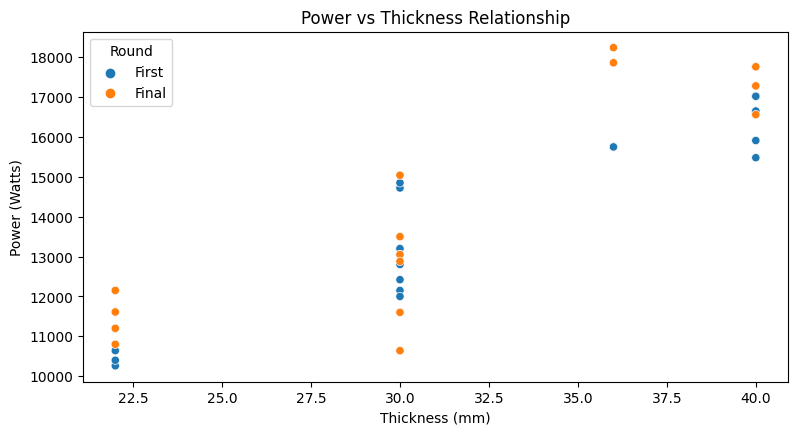

In [83]:
# Plot 3: Power vs Thickness Relationship
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Weld_Thickness', y='Power', hue='Round')
plt.title('Power vs Thickness Relationship')
plt.xlabel('Thickness (mm)')
plt.ylabel('Power (Watts)')

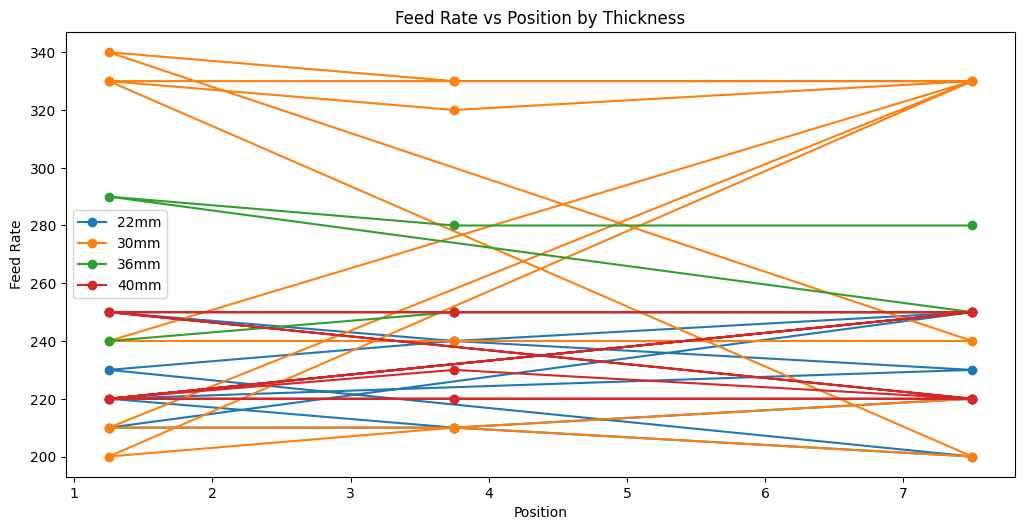

In [85]:
# Plot 4: Feed Rate vs Position by Thickness
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 4)
for thickness in df['Weld_Thickness'].unique():
    subset = df[df['Weld_Thickness'] == thickness]
    plt.plot(subset['Position'], subset['Feed_Rate'], 
             label=f'{thickness}mm', marker='o')
plt.title('Feed Rate vs Position by Thickness')
plt.xlabel('Position')
plt.ylabel('Feed Rate')
plt.legend()

plt.tight_layout()
plt.show()

In [86]:
# Calculate optimal parameter ranges
optimal_ranges = df.groupby('Weld_Thickness').agg({
    'Heat_Input': ['mean', 'std']
}).round(2)

In [87]:
# Print analysis results
print("\nKey Findings and Recommendations:")
print("=" * 80)


Key Findings and Recommendations:


In [90]:
# Analyze parameter consistency
for thickness in df['Weld_Thickness'].unique():
    thickness_data = df[df['Weld_Thickness'] == thickness]
    cv_feed = stats.variation(thickness_data['Feed_Rate']) * 100
    cv_ampere = stats.variation(thickness_data['Ampere']) * 100
    cv_voltage = stats.variation(thickness_data['Voltage']) * 100
    
    print(f"\nThickness: {thickness}mm")
    print(f"Feed Rate CV: {cv_feed:.2f}%")
    print(f"Ampere CV: {cv_ampere:.2f}%")
    print(f"Voltage CV: {cv_voltage:.2f}%")
    
    if cv_feed > 15 or cv_ampere > 15 or cv_voltage > 15:
        print("* High parameter variation detected")

# Calculate heat input efficiency
efficiency_analysis = df.groupby('Weld_Thickness').agg({
    'Heat_Input': ['mean', 'std']
}).round(2)


Thickness: 22mm
Feed Rate CV: 7.11%
Ampere CV: 2.18%
Voltage CV: 5.63%

Thickness: 30mm
Feed Rate CV: 20.69%
Ampere CV: 6.67%
Voltage CV: 7.19%
* High parameter variation detected

Thickness: 36mm
Feed Rate CV: 7.14%
Ampere CV: 4.11%
Voltage CV: 2.63%

Thickness: 40mm
Feed Rate CV: 6.20%
Ampere CV: 1.33%
Voltage CV: 3.41%
